<a href="https://colab.research.google.com/github/saieswaramurali/RECOGNITION_OF_TAMIL_CHARACTERS_USING_CNN/blob/main/RECOGNITION_OF_TAMIL_CHARACTERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [9]:
# to create the dataset out of folders of images of the data
!pip install imutils

In [10]:
from imutils import paths
import cv2
import os

In [11]:
imagepaths = list(paths.list_images("/content/drive/MyDrive/ML/output"))

In [ ]:
print(imagepaths)

In [13]:
# function to convert rgb to grayscale

def rgb2gray(img) :
  r = img[ :, :, 0]
  g = img[ :, :, 1]
  b = img[ :, :, 2]

  return (0.2989 * r + 0.5870 * g + 0.1140 * b)


In [ ]:
#storing the image from the imagepaths

images = []

for image in imagepaths :
  try :
    img = cv2.imread(image) # reading and storing the images on the img literal
    img = rgb2gray(img) # converting the image to gray scale
    img = cv2.resize(img, (90,90)) # resizing them from 480,480 to 30,30 to reduce the computations
    images.append(img)
    print("image loaded")
  except Exception as e :
    print(f"you got {e} error")


In [19]:
images[0].shape, len(images)

((90, 90), 12000)

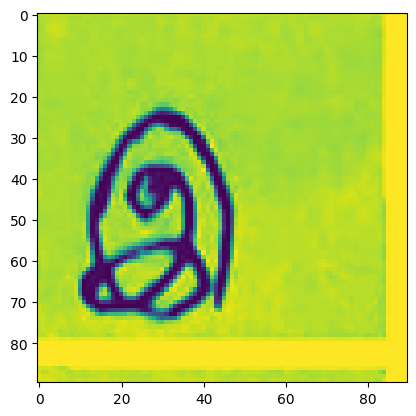

In [20]:
plt.imshow(images[550])

In [21]:
# to produce the label name using the name of image in the image path
labels = []

for i in imagepaths :
  labels.append(i[56::] )

print(labels[550])

3--25.jpg_1415257b-cf30-463d-af0b-75c1eaa8dd3c.jpg


In [22]:
def returnlabel(name) :
  index = 0
  while name[index] != "-" :
    index += 1
  name = name[0:index:1]
  return name


In [23]:
final_labels = []
for label in labels :
  lab = returnlabel(label)
  final_labels.append(lab)

In [24]:
labels = final_labels.copy()
labels[0]

'1'

In [47]:
# now splitting the training and splitting datasets
train_images = []
train_labels = []

for i in range(10000) :
  train_images.append(images[i])
  train_labels.append(int(labels[i]))

test_images = []
test_labels = []
for i in range(10000, 12000) :
  test_images.append(images[i])
  test_labels.append(int(labels[i]))


class_labels =  ['அ', 'ஆ', 'இ', 'ஈ', 'உ', 'ஊ', 'எ', 'ஏ', 'ஐ', 'ஒ', 'ஓ', 'ஔ']


In [ ]:
print(train_labels)

In [49]:
# assining the train_labels to 0-11 instead of 1-12
for i in range(len(train_labels)) :
  train_labels[i] -= 1



In [ ]:
print(train_labels)

ஐ


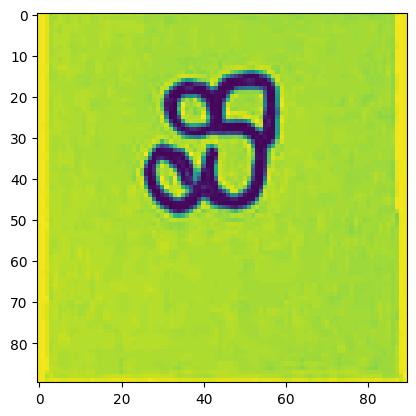

In [52]:
plt.imshow(train_images[100])
a = train_labels[100]
print(class_labels[a])

In [53]:
X_train = np.array(train_images)
y_train = np.array(test_images)
X_train.shape, y_train.shape

X_train = X_train / 255  # feature scaling to reduce the magnitude of the weights involved in the network
y_train = y_train / 255  # ,,,


In [54]:

X_labels = np.array(train_labels)
y_labels = np.array(test_labels)

In [ ]:
type(X_labels) , X_labels[100]


In [ ]:
print(X_train[125])

In [ ]:
print(X_labels)

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential()

# Convolutional and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(90,90 ,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(12, activation='softmax'))

# Compile the model
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 88, 88, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 44, 44, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 42, 42, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 21, 21, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 19, 19, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 9, 9, 128)        

In [67]:
model.fit(X_train, X_labels, epochs=7)

Epoch 1/7
313/313 [==============================] - 3s 10ms/step - loss: 0.0383 - accuracy: 0.9878
Epoch 2/7
313/313 [==============================] - 3s 10ms/step - loss: 0.0275 - accuracy: 0.9914
Epoch 3/7
313/313 [==============================] - 3s 11ms/step - loss: 0.0204 - accuracy: 0.9951
Epoch 4/7
313/313 [==============================] - 3s 10ms/step - loss: 0.0268 - accuracy: 0.9924
Epoch 5/7
313/313 [==============================] - 3s 10ms/step - loss: 0.0309 - accuracy: 0.9900
Epoch 6/7
313/313 [==============================] - 3s 9ms/step - loss: 0.0175 - accuracy: 0.9949
Epoch 7/7
313/313 [==============================] - 3s 10ms/step - loss: 0.0049 - accuracy: 0.9991


In [78]:
m = model.predict(y_train, verbose=1)
n = np.argmax(m[1499])
print(m[0])

63/63 [==============================] - 0s 3ms/step
[8.5050044e-16 3.0297686e-22 1.2194945e-15 1.5520927e-25 2.2212590e-12
 2.6693106e-35 1.9533104e-10 9.9999976e-01 2.2125600e-13 1.1083985e-08
 2.6832305e-07 4.8017597e-27]


ஊ


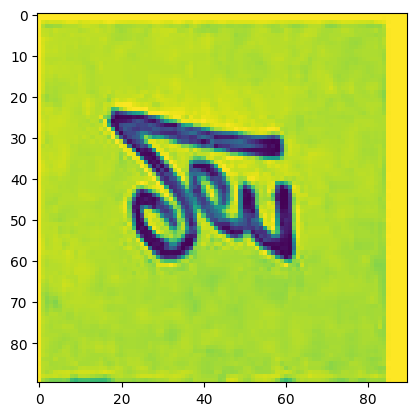

In [79]:
plt.imshow(y_train[1499])
print(class_labels[n])

In [70]:

def evaluate(y_pred, y_real) :
  size = len(y_real)
  c = 0
  for i in range(len(y_real)) :
    if y_pred[i] == y_real[i]  :
      c+=1
      #print(i)

  return float(c / size)



In [71]:
y_pred = []

for i in range(len(y_train)) :
  n = np.argmax(m[i])
  y_pred.append(n + 1)

accuracy = evaluate(y_pred, list(y_labels))
accuracy


0.9645

In [72]:
from sklearn.metrics import classification_report

print(classification_report(y_labels, y_pred, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10 , 11, 12]))

              precision    recall  f1-score   support

           1       0.99      0.95      0.97       171
           2       0.97      0.99      0.98       177
           3       0.95      0.99      0.97       184
           4       0.98      0.99      0.98       146
           5       0.97      0.98      0.97       170
           6       0.99      0.98      0.98       164
           7       0.99      0.95      0.97       165
           8       0.95      0.97      0.96       174
           9       0.95      0.92      0.93       181
          10       0.93      0.94      0.94       151
          11       0.93      0.94      0.94       151
          12       0.98      0.98      0.98       166

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



In [82]:
model.save('TamilCharPrediction.h5')